In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Arima_Rathnapura.csv",parse_dates=['Month'],index_col=['Month'])

In [5]:
df.head()

,Production/Kg
Month,
2016-01-01,6114284.0
2016-02-01,5452146.0
2016-03-01,5424558.0
2016-04-01,6383458.0
2016-05-01,6552106.0


In [6]:
df.tail()

,Production/Kg
Month,
2022-08-01,4149531.0
2022-09-01,4516375.0
2022-10-01,4189250.0
2022-11-01,4275937.0
2022-12-01,4028472.0


In [7]:
ts=df['Production/Kg'].resample('MS').sum()

In [8]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Freq: MS
Series name: Production/Kg
Non-Null Count  Dtype  
--------------  -----  
84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [9]:
ts.head()

Month
2016-01-01    6114284.0
2016-02-01    5452146.0
2016-03-01    5424558.0
2016-04-01    6383458.0
2016-05-01    6552106.0
Freq: MS, Name: Production/Kg, dtype: float64

<Axes: xlabel='Month'>

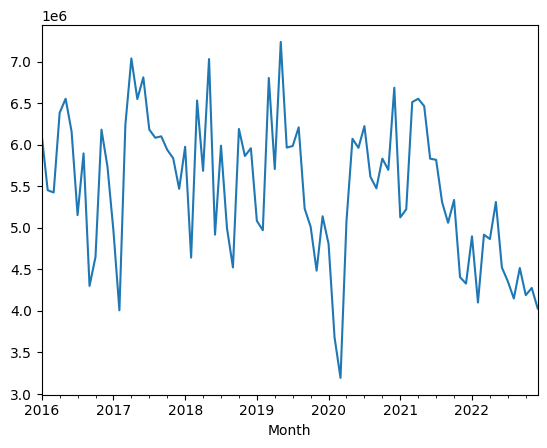

In [10]:
ts.plot()

## Rolling Stastics

In [11]:
def plot_graph(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    
    orig = plt.plot(ts,label='Original')
    mean = plt.plot(rolmean,label='Rolling mean')
    std = plt.plot(rolstd,label = 'Rolling std')
    
    plt.legend(loc = 'best')
    plt.show()

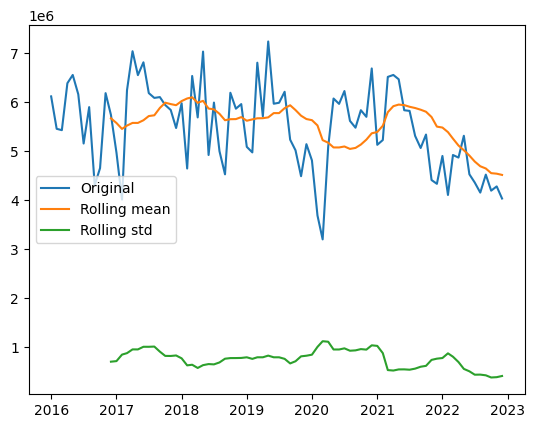

In [12]:
plot_graph(ts)

## ADDFuller Test

In [13]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller

    dftest = adfuller(timeseries)

    print(dftest)

In [14]:
adcf_test(ts)

(-2.5200151209230777, 0.11068006675718123, 5, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 2126.2737524545296)


In [15]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    
    orig = plt.plot(ts,label='Original')
    mean = plt.plot(rolmean,label='Rolling mean')
    std = plt.plot(rolstd,label = 'Rolling std')
    
    plt.legend(loc = 'best')
    plt.show()

    from statsmodels.tsa.stattools import adfuller

    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4],index = ['The Test statstics','Mackinnons approximate p-value','#usedLags','NOBS'])
    print(dfoutput)

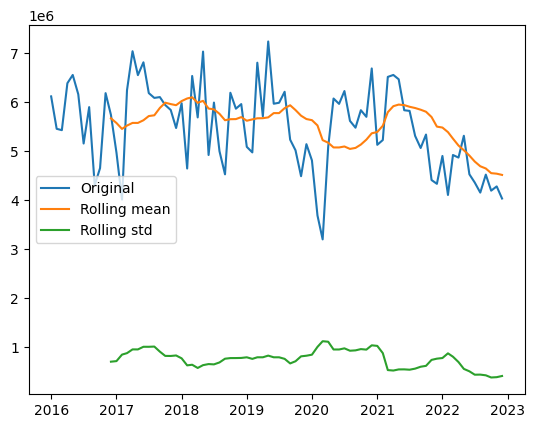

The Test statstics                -2.520015
Mackinnons approximate p-value     0.110680
#usedLags                          5.000000
NOBS                              78.000000
dtype: float64


In [16]:
test_stationarity(ts)

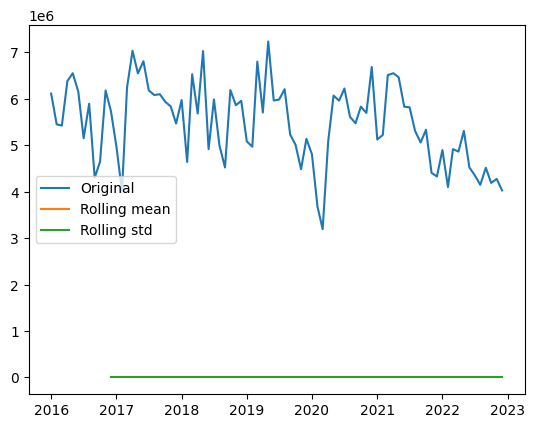

The Test statstics                -4.954571
Mackinnons approximate p-value     0.000027
#usedLags                          0.000000
NOBS                              83.000000
dtype: float64


In [17]:
import numpy as np

production_data_log_scaled = np.log(ts)
test_stationarity(production_data_log_scaled)

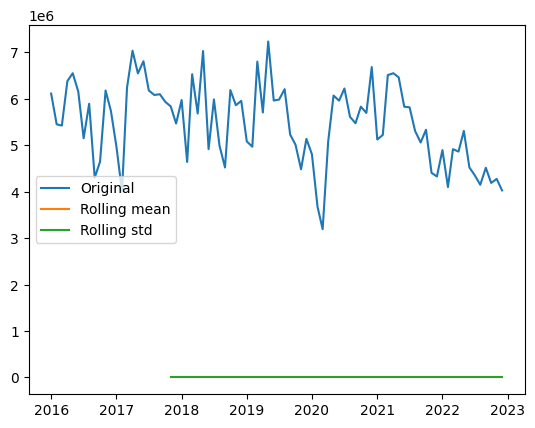

The Test statstics                -5.060942
Mackinnons approximate p-value     0.000017
#usedLags                          0.000000
NOBS                              72.000000
dtype: float64


In [18]:
ma = production_data_log_scaled.rolling(window=12).mean()
production_data_log_scaled_minus_ma = production_data_log_scaled - ma

production_data_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(production_data_log_scaled_minus_ma)

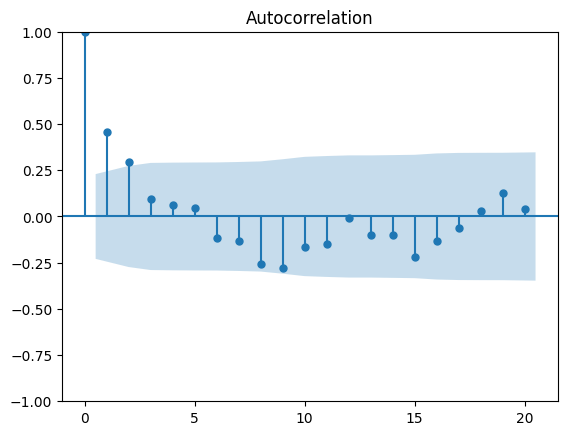

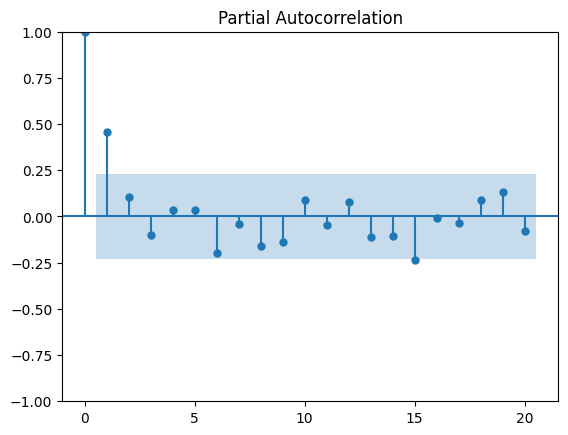

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Directly plot the ACF and PACF for the time series data
plot_acf(production_data_log_scaled_minus_ma, lags=20)
plt.show()

plot_pacf(production_data_log_scaled_minus_ma, lags=20)
plt.show()


C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arg

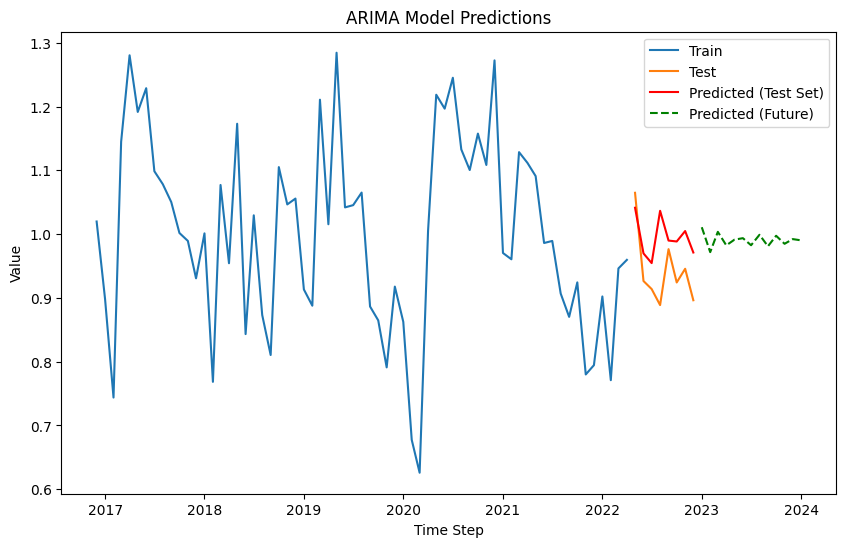

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train, test = train_test_split(production_data_log_scaled_minus_ma, test_size=0.10, shuffle=False)

# Fit the ARIMA model on the training data
model_arima = ARIMA(train, order=(3, 1, 7 ))
model_arima_fit = model_arima.fit()

# Make predictions
predictions = model_arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Assuming you want to predict 10 future values
future_start = len(train) + len(test)
future_end = future_start + 12  # Adjust the number of future values to predict

future_predictions = model_arima_fit.predict(start=future_start, end=future_end, typ='levels')


# If you want to plot the predictions against the actual values
#plt.plot(test, label='Actual',figsize=(10,6))
#plt.plot(predictions, label='Predicted', color='red')
#plt.legend()
#plt.show()


f1=np.exp(future_predictions)
f2=np.exp(train)
f3=np.exp(test)
f4=np.exp(predictions)
plt.figure(figsize=(10, 6))
plt.plot(f2, label='Train')
plt.plot(f3, label='Test')
plt.plot(f4, label='Predicted (Test Set)', color='red')
plt.plot(f1, label='Predicted (Future)', color='green',linestyle='--')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [21]:
test.head()

Month
2022-05-01    0.062825
2022-06-01   -0.076376
2022-07-01   -0.090089
2022-08-01   -0.117986
2022-09-01   -0.023797
Freq: MS, Name: Production/Kg, dtype: float64

In [22]:
test.tail()

Month
2022-08-01   -0.117986
2022-09-01   -0.023797
2022-10-01   -0.078839
2022-11-01   -0.055859
2022-12-01   -0.109487
Freq: MS, Name: Production/Kg, dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error
error3 = mean_squared_error(test,predictions)
print('Test MSE: %0.3f' %error3)


Test MSE: 0.005


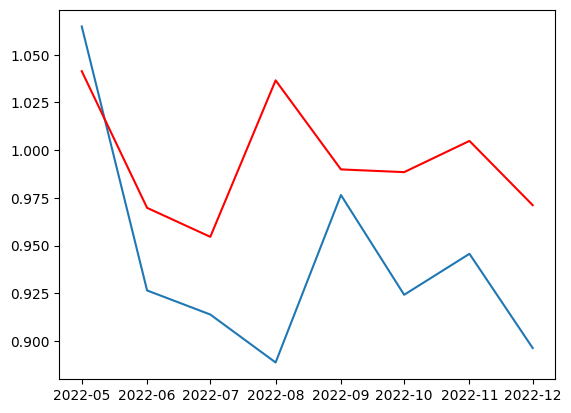

In [24]:
predict = np.exp(predictions)
test_set = np.exp(test)
plt.plot(test_set)
plt.plot(predict, color = 'red')
plt.show()

In [25]:
predict.head()

2022-05-01    1.041406
2022-06-01    0.969768
2022-07-01    0.954573
2022-08-01    1.036598
2022-09-01    0.989915
Freq: MS, Name: predicted_mean, dtype: float64

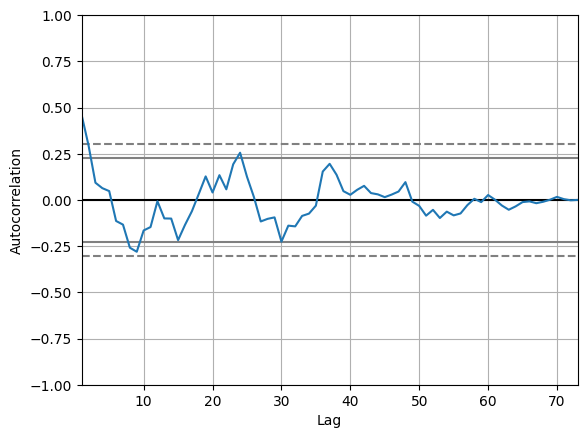

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(production_data_log_scaled_minus_ma)
plt.show()

In [27]:
future_predictions = model_arima_fit.predict(start=len(train) + len(test), end=len(train) + len(test) + future_steps - 1, typ='levels')


NameError: name 'future_steps' is not defined

In [28]:
future_predictions.head()

2023-01-01    0.010780
2023-02-01   -0.028620
2023-03-01    0.003584
2023-04-01   -0.017734
2023-05-01   -0.008707
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
future_predictions.tail()

2023-09-01   -0.019230
2023-10-01   -0.002564
2023-11-01   -0.015267
2023-12-01   -0.007818
2024-01-01   -0.009814
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
f1.head()

2023-01-01    1.010838
2023-02-01    0.971786
2023-03-01    1.003590
2023-04-01    0.982423
2023-05-01    0.991331
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
f1.tail()

2023-09-01    0.980953
2023-10-01    0.997439
2023-11-01    0.984849
2023-12-01    0.992212
2024-01-01    0.990234
Freq: MS, Name: predicted_mean, dtype: float64

In [29]:
import pandas as pd

# Assuming 'future_predictions' is a NumPy array or a Pandas Series
future_predictions_df = pd.DataFrame({'Future Predictions': np.exp(future_predictions)})

# Save the DataFrame to a CSV file
future_predictions_df.to_csv('future_predictions.csv', index=False)
